# Gradient Descents

We will use very simple home prices data set to implement mini batch gradient descent in python.
1. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties

2. Stochastic GD: we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights

3. Mini batch GD: we use a batch of m samples where 0 < m < n (where n is total number of training samples)

### `Batch Gradient Descent`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
0,1056,2,39.07
17,1540,3,60.00
1,2600,4,120.00
11,2785,4,140.00
7,3300,4,155.00


Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation.

### $Price = W1 * X1 (age) + W2 * X2 (bedrooms) + bias$

### 1. Batch Gradient Descent Implementation

In [6]:
scaled_y.shape

(20, 1)

In [7]:
scaled_X.shape[1]

2

In [8]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1] # number of columns in X
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)

    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0] # number of rows in X

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b # w1 * area + w2 * bedrooms + bias

        w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_pred)) # derivatives
        b_grad = -(2 / total_samples) * np.sum(y_true - y_pred)

        w = w - learning_rate * w_grad # adjusting weights
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_pred)) # MSE - Mean Squared Error

        if i % 50 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            # print(f'Epoch: {i}, cost: {cost}')


    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

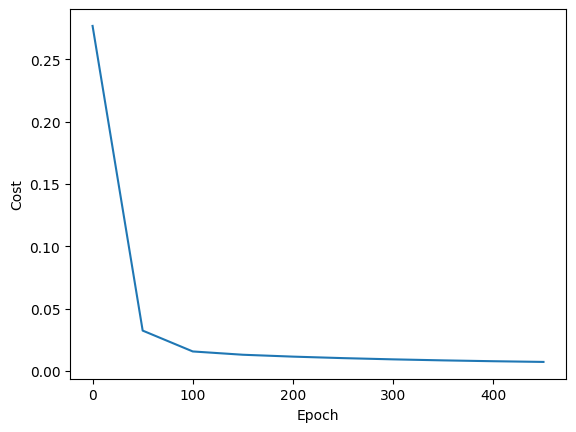

In [9]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)

In [10]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # Here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [11]:
predict(2000, 3, w, b)

/Users/fareed/miniconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


85.93754350783396

In [12]:
predict(2600,4,w,b)

/Users/fareed/miniconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

### `Stochastic Gradient Descent`

Stochastic Gradient Descent will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [13]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

4

In [14]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1) # random index from total samples
        sample_X = X[random_index]
        sample_y = y_true[random_index]

        y_pred = np.dot(w, sample_X.T) + b

        w_grad = -(2/total_samples) * (sample_X.T.dot(sample_y - y_pred))
        b_grad = -(2/total_samples) * (sample_y - y_pred)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y - y_pred)) # MSE

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70844967, 0.67228252]), -0.23300331485119466, 0.011679798046895095)

In [19]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

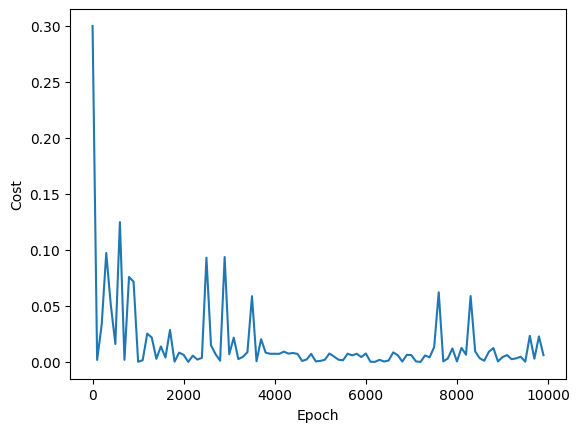

In [15]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [20]:
predict(2600, 4, w_sgd, b_sgd)

/Users/fareed/miniconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


127.976353679109

In [21]:
predict(1500, 2, w_sgd, b_sgd)

/Users/fareed/miniconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


46.31977489916778